<span style="color:cyan; font-size:3em; font-family:Papyrus"> 
<div align="center"><b>Pregunta 3</b></div>
</span> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import feather

data = pd.read_feather('./data/BIG_MART_SALES_PREDICTION.feather')
data.sample(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1710,FDP25,NaN,Low Fat,0.021105,Canned,217.0824,OUT027,1985,Medium,Tier 3,Supermarket Type3,6769.8544
4715,NCS29,NaN,Low Fat,0.121765,Health and Hygiene,264.1884,OUT019,1985,Small,Tier 1,Grocery Store,264.9884
4609,DRD01,12.1,Regular,0.061425,Soft Drinks,56.7614,OUT018,2009,Medium,Tier 3,Supermarket Type2,1049.9666


# Preprocesamiento

## 1. Considere las columnas con datos faltantes, muestre y almacene en disco duro un diagrama de barras que el numero de datos faltantes para esas columnas.

In [2]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

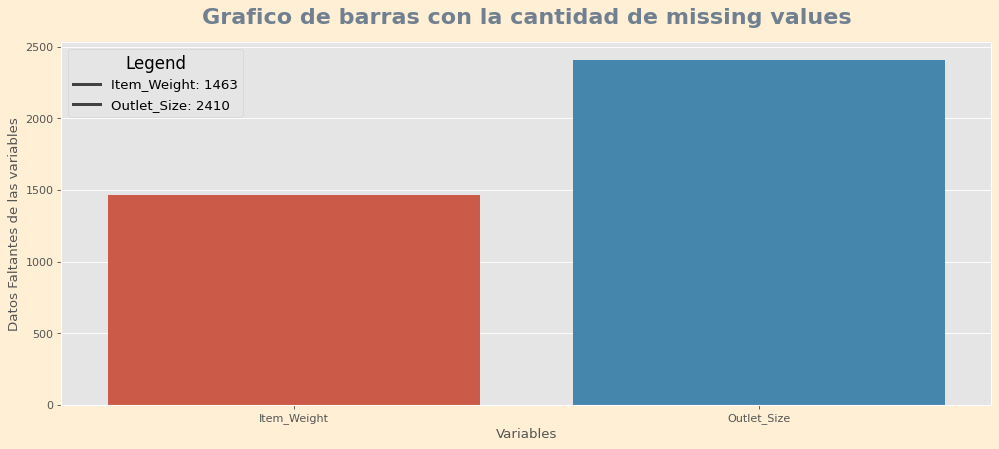

In [3]:
data_variables_with_missing_values = data[['Item_Weight', 'Outlet_Size']]

fig = plt.figure(figsize=(15,6), facecolor = 'papayawhip', edgecolor = '#FDEDEC', dpi=80)
plt.style.use('ggplot')
sns.barplot(
    x=data_variables_with_missing_values.isnull().sum().index, 
    y=data_variables_with_missing_values.isnull().sum().values)
plt.title('Grafico de barras con la cantidad de missing values', fontsize=20, color="slategrey", 
fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center")
plt.xlabel('Variables')
plt.ylabel('Datos Faltantes de las variables')
plt.xticks(rotation=0)
plt.legend(
    labels=[
        f'Item_Weight: {data_variables_with_missing_values.isnull().sum().values[0]}', 
        f'Outlet_Size: {data_variables_with_missing_values.isnull().sum().values[1]}'], 
    title = "Legend", 
    fontsize = 'large', 
    title_fontsize = "15",         
    loc = 2, 
    # bbox_to_anchor = (1,1)
    )

# save figure
plt.savefig('./imgs/Columnas_con_datos_faltantes_de_la_data_BIG_MART_SALES_PREDICTION.png',
                bbox_inches='tight', dpi=300)
plt.show()


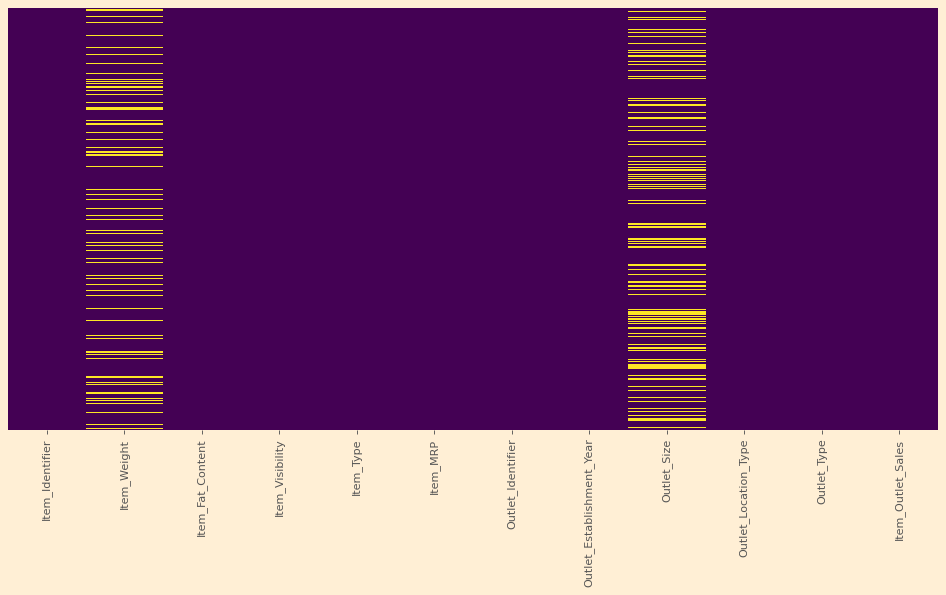

In [4]:
fig = plt.figure(figsize=(15,7), facecolor = 'papayawhip', edgecolor = '#FDEDEC', dpi=80)
plt.style.use('ggplot')
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

## 2. A partir del contenido de las columnas, separe estas en columnas con datos categóricos (nombre del dataframe : BM_cat) y columnas con datos numéricos (BM_Cuan). Para cada uno de estos dataframes realice una imputación adecuada para los valores faltantes.

In [5]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
BM_cat = data[['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']]
BM_cuan = data[['Item_Weight', 'Item_Visibility','Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']]

### Imputation

In [7]:
BM_cat.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [8]:
# make imputation for categorical variables for outlet_Size column
BM_cat['Outlet_Size'].fillna(BM_cat['Outlet_Size'].mode()[0], inplace=True)
BM_cat['Outlet_Size'].isnull().sum()

C:\Users\joel_\AppData\Local\Temp\ipykernel_1472\1302328042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BM_cat['Outlet_Size'].fillna(BM_cat['Outlet_Size'].mode()[0], inplace=True)


0

In [9]:
BM_cuan.isnull().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# make imputation for numerical varible Item_Weight column
BM_cuan['Item_Weight'].fillna(BM_cuan['Item_Weight'].mean(), inplace=True)
BM_cuan['Item_Weight'].isnull().sum()

C:\Users\joel_\AppData\Local\Temp\ipykernel_1472\1041684636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BM_cuan['Item_Weight'].fillna(BM_cuan['Item_Weight'].mean(), inplace=True)


0

## 3. Muestre un histograma de la columna Item_Outlet_Sales para cada nivel de la variable Outlet_type ('Supermarket Type1', 'Supermarket Type2', 'Grocery Store','Supermarket Type3')

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

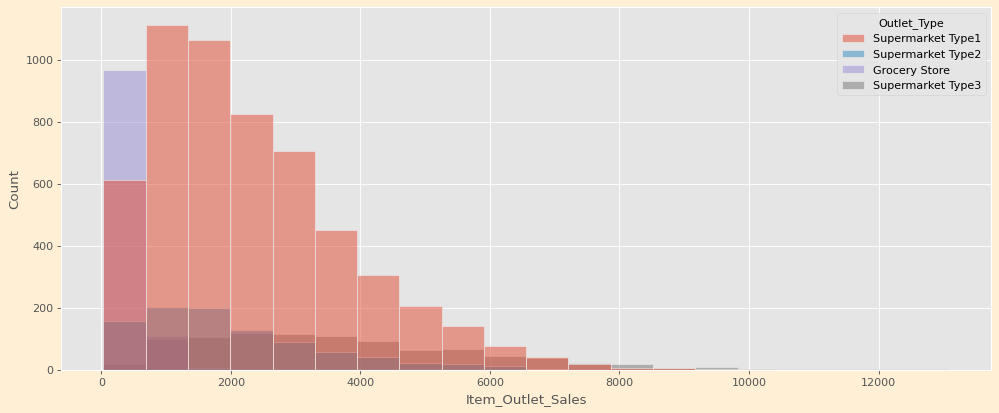

In [11]:
fig = plt.figure(figsize=(15,6), facecolor = 'papayawhip', edgecolor = '#FDEDEC', dpi=80)
plt.style.use('ggplot')
sns.histplot(x = 'Item_Outlet_Sales', data = data, hue='Outlet_Type' ,bins=20, color='#FFD700', alpha=0.5, legend=True)